# Initialize Fast Metric Calculations

In [1]:
from zotbin.binned import *

In [2]:
from tomo_challenge import load_redshift
from tomo_challenge.jax_metrics import ell_binning

Found classifier Random
Found classifier ZotBin
Found classifier RandomForest
Found classifier IBandOnly


Load the true redshifts for the training data:

In [3]:
training_file='/media/data2/tomo_challenge_data/ugrizy_buzzard/training.hdf5'
training_z = load_redshift(training_file)

Calculate the edges to use:

/opt/anaconda3/envs/ML/lib/python3.7/site-packages/jax/lax/lax.py:5905: UserWarning: Explicitly requested dtype <class 'jax.numpy.lax_numpy.int64'> requested in astype is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  warnings.warn(msg.format(dtype, fun_name , truncated_dtype))


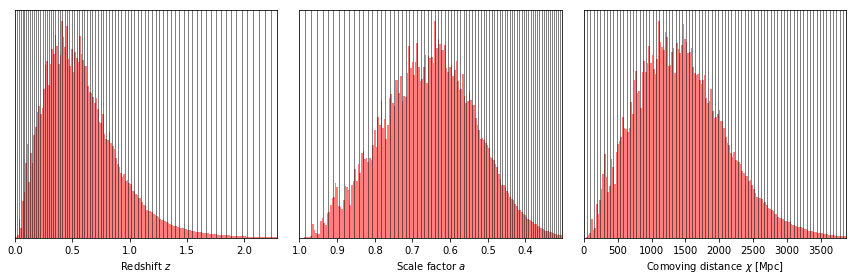

In [4]:
zedges = get_zedges_chi(training_z, 80, plot=True)

Initialise the multipoles to use:

In [5]:
ell, _ = ell_binning()

Calculate the cl's and their partials using these redshift bins:

In [11]:
%time ngals, noise, cl_in = init_binned_cl(zedges, ell, nagrid=4096)

0 (12880, 100)
1 (12880, 100)
2 (12880, 100)
3 (12880, 100)
4 (12880, 100)
5 (12880, 100)
6 (12880, 100)
(12880, 100)
CPU times: user 24min 54s, sys: 2min 2s, total: 26min 56s
Wall time: 22min 53s


In [12]:
save_binned('binned_80_4k.npz', zedges, ell, ngals, noise, cl_in)

In [9]:
%time ngals, noise, cl_in = init_binned_cl(zedges, ell, nagrid=2048)

0 (12880, 100)
1 (12880, 100)
2 (12880, 100)
3 (12880, 100)
4 (12880, 100)
5 (12880, 100)
6 (12880, 100)
(12880, 100)
CPU times: user 24min 32s, sys: 2min 12s, total: 26min 44s
Wall time: 22min 24s


In [10]:
save_binned('binned_80_2k.npz', zedges, ell, ngals, noise, cl_in)

In [6]:
%time ngals, noise, cl_in = init_binned_cl(zedges, ell, nagrid=1024)

0 (12880, 100)
1 (12880, 100)
2 (12880, 100)
3 (12880, 100)
4 (12880, 100)
5 (12880, 100)
6 (12880, 100)
(12880, 100)
CPU times: user 24min 29s, sys: 2min 24s, total: 26min 54s
Wall time: 22min 33s


In [7]:
save_binned('binned_80.npz', zedges, ell, ngals, noise, cl_in)

In [6]:
%time ngals, noise, cl_in = init_binned_cl(zedges, ell, nagrid=1024)

0 (3240, 100)
1 (3240, 100)
2 (3240, 100)
3 (3240, 100)
4 (3240, 100)
5 (3240, 100)
6 (3240, 100)
(3240, 100)
CPU times: user 7min 6s, sys: 44.2 s, total: 7min 50s
Wall time: 6min 56s


In [7]:
save_binned('binned_40.npz', zedges, ell, ngals, noise, cl_in)

In [8]:
!ls -lh binned_*.npz

-rw-rw-r-- 1 dkirkby dkirkby 2.1M Aug 27 16:50 binned_19.npz
-rw-rw-r-- 1 dkirkby dkirkby 471K Aug 26 15:56 binned_20.npz
-rw-rw-r-- 1 dkirkby dkirkby 7.2M Aug 28 11:09 binned_28.npz
-rw-rw-r-- 1 dkirkby dkirkby 988K Aug 27 10:10 binned_29.npz
-rw-rw-r-- 1 dkirkby dkirkby  15M Aug 31 17:03 binned_40.npz
-rw-rw-r-- 1 dkirkby dkirkby  59M Sep  9 17:44 binned_80.npz


In [6]:
%time ngals, noise, cl_in = init_binned_cl(zedges, ell)

/opt/anaconda3/envs/ML/lib/python3.7/site-packages/jax/lax/lax.py:5905: UserWarning: Explicitly requested dtype <class 'jax.numpy.lax_numpy.int64'> requested in astype is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  warnings.warn(msg.format(dtype, fun_name , truncated_dtype))


0 (1596, 100)
1 (1596, 100)
2 (1596, 100)
3 (1596, 100)
4 (1596, 100)
5 (1596, 100)
6 (1596, 100)
(1596, 100)
CPU times: user 4min 24s, sys: 26 s, total: 4min 50s
Wall time: 4min 30s


Save the results for using later:

In [7]:
save_binned('binned_28.npz', zedges, ell, ngals, noise, cl_in)

In [9]:
!ls -lh binned_28.npz

-rw-rw-r-- 1 dkirkby dkirkby 7.2M Aug 28 11:09 binned_28.npz
